# Week Three Part 2

Ari and Lucas

# Import data and visualize the basic graph as found online

Biadjacency matrix
<Compressed Sparse Row sparse array of dtype 'int64'
	with 89 stored elements and shape (18, 14)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
1

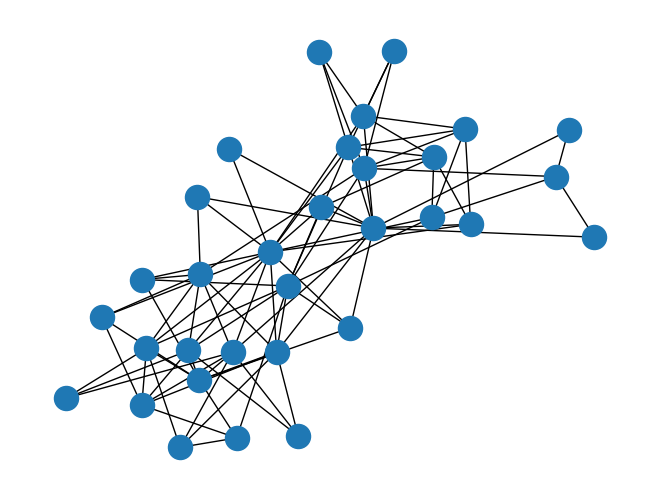

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()

Since the graph is bipartite, we can color the network by both, women and club to make better inferences. Additionally, we can compute the degree centralirty of the women and clubs to understand which ones may be important.

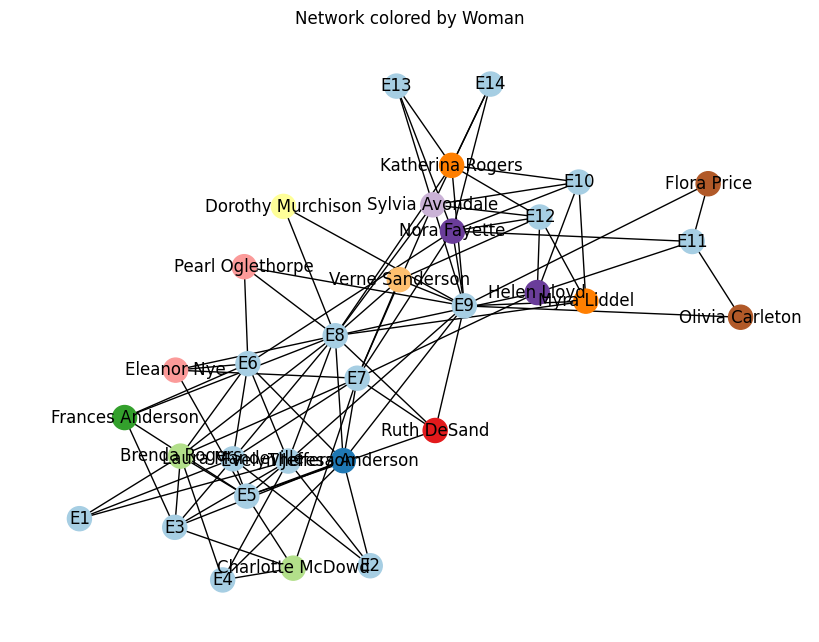

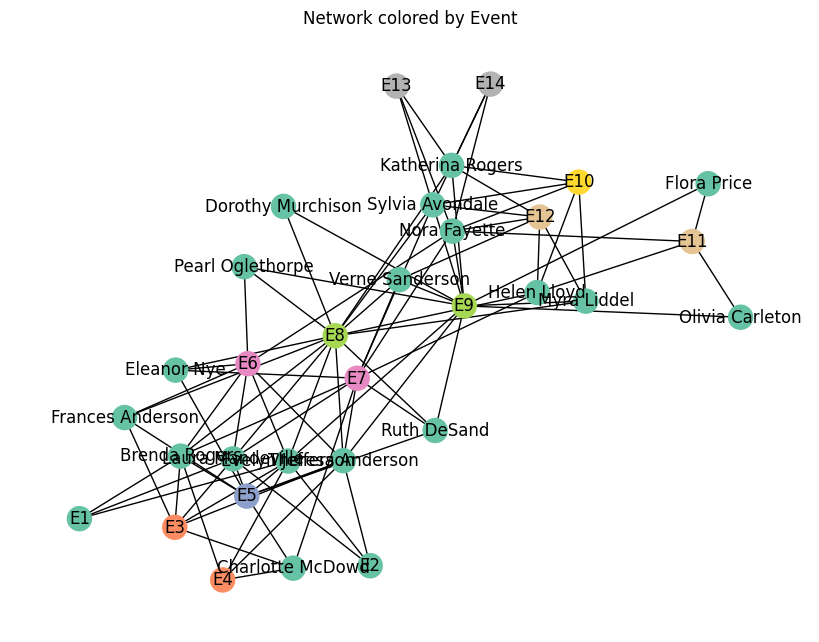

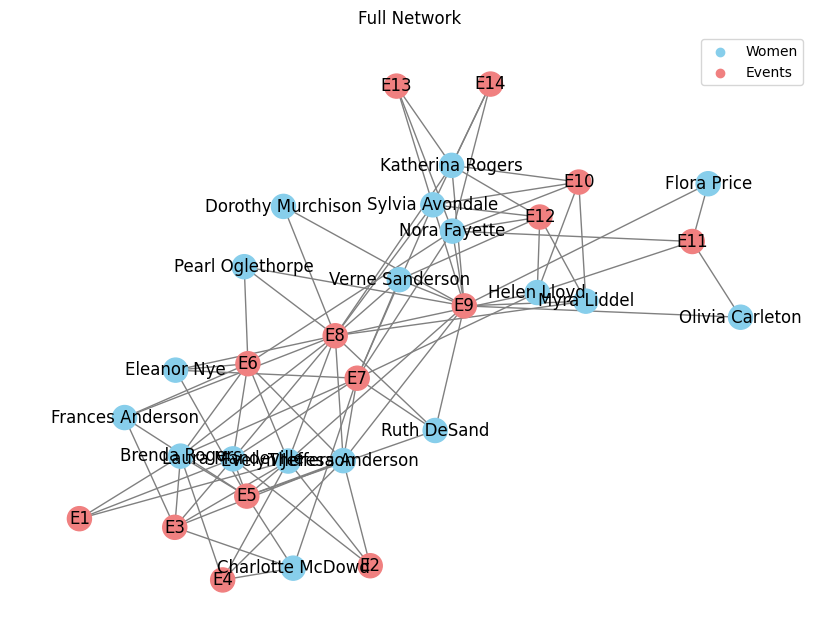

Degree Centrality Women:
Evelyn Jefferson: 0.26
Theresa Anderson: 0.26
Nora Fayette: 0.26
Laura Mandeville: 0.23
Brenda Rogers: 0.23
Sylvia Avondale: 0.23
Katherina Rogers: 0.19
Helen Lloyd: 0.16
Charlotte McDowd: 0.13
Frances Anderson: 0.13
Eleanor Nye: 0.13
Ruth DeSand: 0.13
Verne Sanderson: 0.13
Myra Liddel: 0.13
Pearl Oglethorpe: 0.10
Dorothy Murchison: 0.06
Olivia Carleton: 0.06
Flora Price: 0.06

Degree Centrality Clubs:
E8: 0.45
E9: 0.39
E7: 0.32
E5: 0.26
E6: 0.26
E3: 0.19
E12: 0.19
E10: 0.16
E4: 0.13
E11: 0.13
E1: 0.10
E2: 0.10
E13: 0.10
E14: 0.10


In [22]:
woman_colors = {w: i for i, w in enumerate(women)}
node_colors_woman = [woman_colors.get(node, 0) for node in G.nodes()]
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors_woman, cmap=plt.cm.Paired)
plt.title('Network colored by Woman')
plt.show()

club_colors = {c: i for i, c in enumerate(clubs)}
node_colors_clubs = [club_colors.get(node, 0) for node in G.nodes()]
plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color=node_colors_clubs, cmap=plt.cm.Set2)
plt.title('Network colored by Event')
plt.show()

colors = ['skyblue' if node in women else 'lightcoral' for node in G.nodes()]
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=colors, edge_color='gray')
plt.title('Full Network')
plt.scatter([], [], c='skyblue', label='Women')
plt.scatter([], [], c='lightcoral', label='Events')
plt.legend()
plt.show()

#Network Analysis Women
centrality = nx.degree_centrality(G)
print('Degree Centrality Women:')
for w, val in sorted(((w, centrality.get(w, 0)) for w in women), key=lambda x: x[1], reverse=True):
    print(f'{w}: {val:.2f}')

#Network Analysis Clubs
print('\nDegree Centrality Clubs:')
for c, val in sorted(((c, centrality.get(c, 0)) for c in clubs), key=lambda x: x[1], reverse=True):
    print(f'{c}: {val:.2f}')

The output above shows us that the woman with the highest degree centrality, meaning the most connected woman, is a tie between Evelyn Jefferson, Theresa Anderson, and Nora Fayette. Additionally, the most connected club is E8. Looking at the colored network graph, we can see that all three women are connected to club E8. This begs the question whether more connected women are in the more connected clubs. To further investigate this, we can run a correlation between the degree centralities.

Correlation between womans degree centrality and average club degree centrality: -0.62 (p=0.00637)


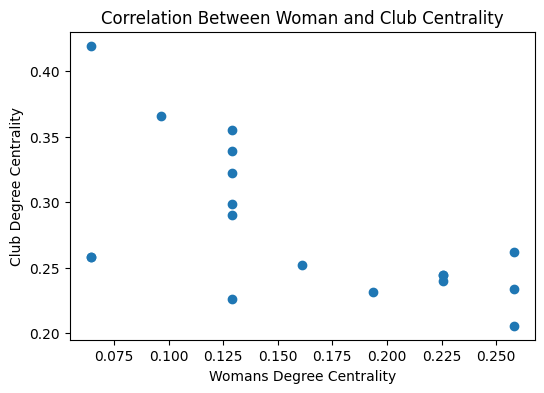

In [4]:
import numpy as np
from scipy.stats import pearsonr

#Get degree centrality for women and clubs
woman_centrality = {w: centrality.get(w,0) for w in women}
club_centrality = {c: centrality.get(c,0) for c in clubs}

woman_avg_club_centrality = {}
for w in women:
    clubs_of_woman = [n for n in G.neighbors(w) if n in clubs]
    if clubs_of_woman:
        woman_avg_club_centrality[w] = np.mean([club_centrality[c] for c in clubs_of_woman])
    else:
        woman_avg_club_centrality[w] = 0

woman_centrality_list = []
avg_club_centrality_list = []
for w in women:
    woman_centrality_list.append(woman_centrality[w])
    avg_club_centrality_list.append(woman_avg_club_centrality[w])

corr, pval = pearsonr(woman_centrality_list, avg_club_centrality_list)
print(f'Correlation between womans degree centrality and average club degree centrality: {corr:.2f} (p={pval:.3})')

plt.figure(figsize=(6,4))
plt.scatter(woman_centrality_list, avg_club_centrality_list)
plt.xlabel('Womans Degree Centrality')
plt.ylabel('Club Degree Centrality')
plt.title('Correlation Between Woman and Club Centrality')
plt.show()

Interestingly, the correlation above shows the exact opposite phenomenon as previously assumed: higher club degree centrality correlated with lower woman degree centrality. Of course, the sample size is quite small, nevertheless, this could indicate a structural pattern in the network, such as:

* Highly connected women may be bridging less central clubs, acting as connectors or brokers.
* Well connected clubs may have more members with lower individual centrality, possibly due to their popularity or inclusiveness.

This is probably due to these smaller clubs being very exclusive and set up by the higher up the social ladder women among themselves a.k.a. "the popular table".  

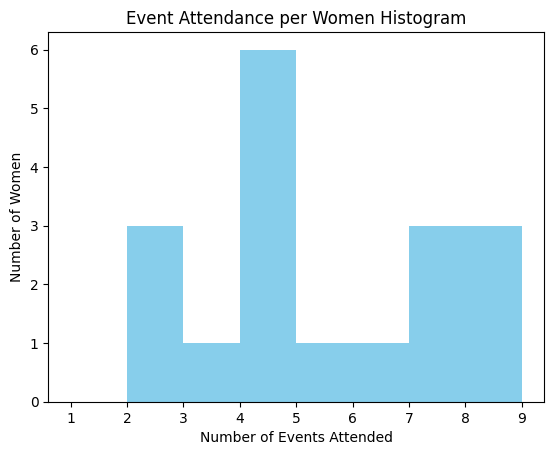

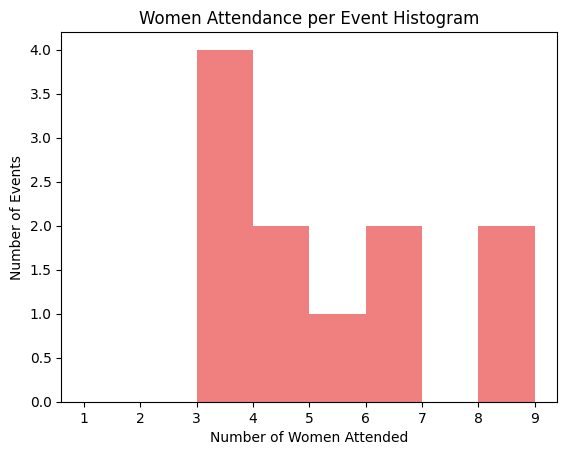

In [14]:
plt.hist([G.degree(w) for w in women], bins=range(1, 10), color='skyblue')
plt.title('Event Attendance per Women Histogram')
plt.xlabel('Number of Events Attended')
plt.ylabel('Number of Women')
plt.show()

plt.hist([G.degree(c) for c in clubs], bins=range(1, 10), color='lightcoral')
plt.title('Women Attendance per Event Histogram')
plt.xlabel('Number of Women Attended')
plt.ylabel('Number of Events')
plt.show()

Above are some histograms to show the distribution of women per event and events per women. Through these, we can make conclusions on the averages for both. Most women seems to attend 4 events and most events are attended by 3 women.

It is also interesting to see that the event histogram (2nd one) is far more leveled or the distribution is tighter than the women one. This could indicate that events roughly stick to the same/average number of attending women, however, how active a women is about attending events is much more varied.  



In [25]:
import networkx.algorithms.community as nx_comm

communities = nx_comm.greedy_modularity_communities(G)
for i, group in enumerate(communities):
    print(f"Community {i+1}: {list(group)}")

Community 1: ['Pearl Oglethorpe', 'Ruth DeSand', 'Evelyn Jefferson', 'E1', 'E7', 'E5', 'E3', 'E6', 'Eleanor Nye', 'Brenda Rogers', 'Theresa Anderson', 'E2', 'Charlotte McDowd', 'Laura Mandeville', 'E4', 'Frances Anderson']
Community 2: ['Sylvia Avondale', 'E11', 'E10', 'E13', 'Flora Price', 'Katherina Rogers', 'Myra Liddel', 'Nora Fayette', 'E9', 'E12', 'E14', 'Helen Lloyd', 'Olivia Carleton']
Community 3: ['Verne Sanderson', 'E8', 'Dorothy Murchison']


The above code is to find clusters of women and events within the data. This find certain communities of women that often go to the same events. In this case, 3 communities were found. The first one is the biggest with _ women and 7 events attended. The second one is also very big with _ women and _ events attended. The fact that the third community is only 2 women and 1 event means that this one and any other communities are small and not neccessary. These first two are probably recognized as the two main social circles or cliques in this network.

Interestingly, earlier found that we had three women tied for the most connected/highest degree woman: Evelyn Jefferson, Theresa Anderson, and Nora Fayette. Evelyn and Theresa are both in the first community while Nora is in the second. Evelyn and Theresa are probably the most popular or connected with in their sub-community but Nora is the queen bee of her own with the next connected women in her sub-community being Sylvia Avondale who is 6th.